In [457]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm

In [458]:
salary = pd.read_csv('salaries.csv')
discipline = pd.read_csv('role.csv')

In [572]:
salary

,age,gender,education_level,role_name,years_of_experience,basic_salary,discipline
0,32,Male,Bachelors,software engineer,5.0,90000.0,engineering
1,32,Male,Bachelors,software engineer,5.0,90000.0,engineering
2,28,Female,Masters,data analyst,3.0,65000.0,data science & analytics
3,28,Female,Masters,data analyst,3.0,65000.0,data science & analytics
4,45,Male,PhD,senior manager,15.0,150000.0,unknown
...,...,...,...,...,...,...,...
7933,32,Male,Bachelors,product manager,5.0,80000.0,product
7934,29,Female,Not applicable,product manager,8.0,65000.0,product
7935,29,Female,Not applicable,product manager,8.0,65000.0,product
7936,30,Female,Bachelors,product owner,5.0,65000.0,product


In [460]:
discipline

,id,role_name,discipline
0,1,Software Engineer,Engineering
1,2,Data Analyst,Data Science & Analytics
2,3,Senior Manager,Unknown
3,4,Sales Associate,Sales
4,5,Director,Unknown
...,...,...,...
198,199,Junior Designer,UX & Design
199,200,Data Product Manager,Product
200,201,Product Development Analyst,Data Science & Analytics
201,202,Director,Unknown


In [461]:
# clean the data

salary.columns = [s.strip() for s in headers]

In [462]:
salary['role_name'] = [s.strip() for s in salary['role_name']]
salary['role_name']

0       Software Engineer
1            Data Analyst
2          Senior Manager
3         Sales Associate
4                Director
              ...        
6714      Product manager
6715      Product Manager
6716      Product Manager
6717        Product owner
6718        Product Owner
Name: role_name, Length: 6719, dtype: object

In [463]:
discipline['role_name'] = [s.strip() for s in discipline['role_name']]
discipline['role_name']

0                Software Engineer
1                     Data Analyst
2                   Senior Manager
3                  Sales Associate
4                         Director
                  ...             
198                Junior Designer
199           Data Product Manager
200    Product Development Analyst
201                       Director
202                  Product owner
Name: role_name, Length: 203, dtype: object

In [464]:
discipline['discipline'] = [s.strip() for s in discipline['discipline']]
discipline['discipline']

0                   Engineering
1      Data Science & Analytics
2                       Unknown
3                         Sales
4                       Unknown
                 ...           
198                 UX & Design
199                     Product
200    Data Science & Analytics
201                     Unknown
202                     Product
Name: discipline, Length: 203, dtype: object

In [465]:
discipline['role_name'] = discipline['role_name'].str.lower()
discipline['discipline'] = discipline['discipline'].str.lower()

In [467]:
salary['role_name'] = salary['role_name'].str.lower()
salary

,age,gender,education_level,role_name,years_of_experience,basic_salary,currency
0,32,Male,Bachelors,software engineer,5.0,90000.0,gbp
1,28,Female,Masters,data analyst,3.0,65000.0,gbp
2,45,Male,PhD,senior manager,15.0,150000.0,gbp
3,36,Female,Bachelors,sales associate,7.0,60000.0,gbp
4,52,Male,Masters,director,20.0,200000.0,gbp
...,...,...,...,...,...,...,...
6714,35,Male,Bachelors,product manager,10.0,75000.0,gbp
6715,32,Male,Bachelors,product manager,5.0,80000.0,gbp
6716,29,Female,Not applicable,product manager,8.0,65000.0,gbp
6717,30,Female,Bachelors,product owner,5.0,65000.0,gbp


In [468]:
salary = pd.merge(salary, discipline, on='role_name', how='left')
salary

,age,gender,education_level,role_name,years_of_experience,basic_salary,currency,id,discipline
0,32,Male,Bachelors,software engineer,5.0,90000.0,gbp,1,engineering
1,32,Male,Bachelors,software engineer,5.0,90000.0,gbp,198,engineering
2,28,Female,Masters,data analyst,3.0,65000.0,gbp,2,data science & analytics
3,28,Female,Masters,data analyst,3.0,65000.0,gbp,196,data science & analytics
4,45,Male,PhD,senior manager,15.0,150000.0,gbp,3,unknown
...,...,...,...,...,...,...,...,...,...
7933,32,Male,Bachelors,product manager,5.0,80000.0,gbp,192,product
7934,29,Female,Not applicable,product manager,8.0,65000.0,gbp,7,product
7935,29,Female,Not applicable,product manager,8.0,65000.0,gbp,192,product
7936,30,Female,Bachelors,product owner,5.0,65000.0,gbp,203,product


In [470]:
sns.set_style('darkgrid')

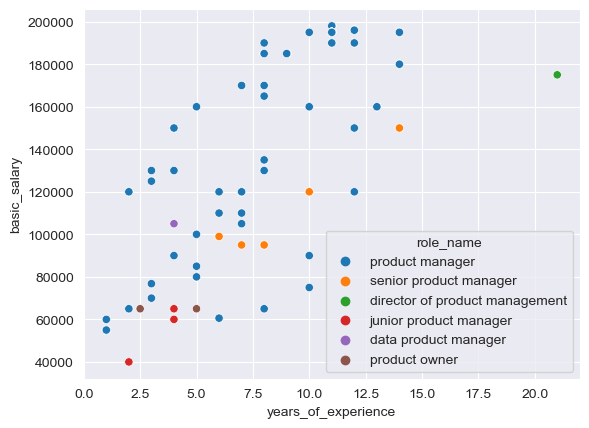

In [472]:
_ = sns.scatterplot(x="years_of_experience", y="basic_salary", hue="role_name", data=salary[salary['discipline']=='product'])

In [506]:
product_salary = salary[salary['role_name']=='product manager']
product_salary

,age,gender,education_level,role_name,years_of_experience,basic_salary,currency,discipline
9,42,Female,Masters,product manager,12.0,120000.0,gbp,product
10,42,Female,Masters,product manager,12.0,120000.0,gbp,product
63,35,Male,Masters,product manager,7.0,105000.0,gbp,product
64,35,Male,Masters,product manager,7.0,105000.0,gbp,product
393,26,Male,Masters,product manager,2.0,120000.0,gbp,product
...,...,...,...,...,...,...,...,...
7931,35,Male,Bachelors,product manager,10.0,75000.0,gbp,product
7932,32,Male,Bachelors,product manager,5.0,80000.0,gbp,product
7933,32,Male,Bachelors,product manager,5.0,80000.0,gbp,product
7934,29,Female,Not applicable,product manager,8.0,65000.0,gbp,product


In [507]:
np.unique(product_salary['gender'])

array(['Female', 'Female ', 'Male', 'Male '], dtype=object)

In [508]:
product_salary['gender'] = product_salary['gender'].str.lower()
product_salary['gender'] = [g.strip() for g in product_salary['gender']]
np.unique(product_salary.gender, return_counts=True)

/tmp/ipykernel_82157/224746661.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_salary['gender'] = product_salary['gender'].str.lower()
/tmp/ipykernel_82157/224746661.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_salary['gender'] = [g.strip() for g in product_salary['gender']]


(array(['female', 'male'], dtype=object), array([210, 428]))

In [509]:
gender = pd.get_dummies(product_salary.gender)
gender = gender.replace({True: 1, False: 0})
gender

,female,male
9,1,0
10,1,0
63,0,1
64,0,1
393,0,1
...,...,...
7931,0,1
7932,0,1
7933,0,1
7934,1,0


In [510]:
product_salary['education_level'] = [e.strip() for e in product_salary['education_level']]
product_salary['education_level'] = product_salary['education_level'].str.lower()
np.unique(product_salary['education_level'])

/tmp/ipykernel_82157/2632962654.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_salary['education_level'] = [e.strip() for e in product_salary['education_level']]
/tmp/ipykernel_82157/2632962654.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_salary['education_level'] = product_salary['education_level'].str.lower()


array(['bachelors', 'masters', 'not applicable', 'phd'], dtype=object)

In [511]:
edu = pd.get_dummies(product_salary.education_level)
edu = edu.replace({True: 1, False: 0})
edu

,bachelors,masters,not applicable,phd
9,0,1,0,0
10,0,1,0,0
63,0,1,0,0
64,0,1,0,0
393,0,1,0,0
...,...,...,...,...
7931,1,0,0,0
7932,1,0,0,0
7933,1,0,0,0
7934,0,0,1,0


In [519]:
y = product_salary['basic_salary'].dropna()

In [562]:
# X = pd.concat([gender.female, edu.bachelors, edu.masters, edu.phd, product_salary.years_of_experience], axis=1)
# X

X = pd.concat([edu.bachelors, edu.masters, edu.phd, product_salary.years_of_experience], axis=1)
X

,bachelors,masters,phd,years_of_experience
9,0,1,0,12.0
10,0,1,0,12.0
63,0,1,0,7.0
64,0,1,0,7.0
393,0,1,0,2.0
...,...,...,...,...
7931,1,0,0,10.0
7932,1,0,0,5.0
7933,1,0,0,5.0
7934,0,0,0,8.0


In [563]:
X = sm.add_constant(X)
X

,const,bachelors,masters,phd,years_of_experience
9,1.0,0,1,0,12.0
10,1.0,0,1,0,12.0
63,1.0,0,1,0,7.0
64,1.0,0,1,0,7.0
393,1.0,0,1,0,2.0
...,...,...,...,...,...
7931,1.0,1,0,0,10.0
7932,1.0,1,0,0,5.0
7933,1.0,1,0,0,5.0
7934,1.0,0,0,0,8.0


In [564]:
model = sm.OLS(y, X, missing="drop") # some rows contain NaN

In [565]:
result = model.fit()

In [566]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           basic_salary   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     444.3
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          3.84e-182
Time:                        23:22:32   Log-Likelihood:                -7361.5
No. Observations:                 638   AIC:                         1.473e+04
Df Residuals:                     633   BIC:                         1.476e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -7504.0659   1.78e+04     -0.423      0.673   -4.24e+04    2.74e+04
bachelors            7.156e+04   1.77e+04      4.046      0.000    3.68e+04    1.06e+05
masters              8.586e+04   1.77e+04      4.855      0.000    5.11e+04    1.21e+05
phd                  7.562e+04   1.94e+04      3.903      0.000    3.76e+04    1.14e+05
years_of_experience  9063.0082    278.984     32.486      0.000    8515.162    9610.855
==============================================================================
Omnibus:                       13.827   Durbin-Watson:                   0.221
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               10.431
Skew:                           0.212   Prob(JB):                      0.00543
Kurtosis:                       2.538   Cond. No.                         319.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [567]:
beta = result.params
beta

const                  -7504.065926
bachelors              71562.956775
masters                85862.590733
phd                    75621.950556
years_of_experience     9063.008241
dtype: float64

In [569]:
product = np.array([1,1,0,0,1])
# [ const, bachelors, masters, phd, years_of_experience ]
linear_out = np.dot(beta, product)
linear_out

73121.89909025026

In [570]:
product = []

for i in range(1,16):
    data = np.array([1,1,0,0,i])
    linear_out = np.dot(beta, data)
    product.append(linear_out)

product

[73121.89909025026,
 82184.90733097546,
 91247.91557170067,
 100310.92381242586,
 109373.93205315105,
 118436.94029387625,
 127499.94853460146,
 136562.95677532663,
 145625.96501605184,
 154688.97325677704,
 163751.98149750225,
 172814.98973822745,
 181877.99797895263,
 190941.00621967783,
 200004.01446040304]